# Chapter 5 - Machine Learning with Scikit-learn 

In [15]:
%pip install kaggle ipykernel pandas sqllite

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqllite (from versions: none)
ERROR: No matching distribution found for sqllite


### Importing CSV, Excel, and Other File Formats

In [12]:
import pandas as pd
# Load a CSV file
df = pd.read_csv('datasets/file.csv')

You can use the code below in case your datasets is in json or parquet format, also a sqllite example is provided. Uncomment and run

In [16]:
# Load a JSON file
#df = pd.read_json('path/to/your/file.json')
	
# Load a Parquet file
#df = pd.read_parquet('path/to/your/file.parquet')

# Load data from a SQL database
#import sqlite3

#conn = sqlite3.connect('path/to/your/database.db')
#df = pd.read_sql_query('SELECT * FROM table_name', conn)


### Data preparation and processing

In [73]:
import pandas as pd

# Load the dataset
df = pd.read_csv('datasets/building_energy_consumption.csv')
print("Initial dataset shape:", df.shape)
print(df.head())

Initial dataset shape: (48, 5)
         date building_type  temperature  occupancy  energy_consumption
0  2023-01-01   Residential        21.23      745.0             1091.46
1  2023-01-02    Commercial        16.78      625.0             1762.85
2  2023-01-03    Industrial        33.45      308.0             1735.28
3  2023-01-04    Industrial        25.37      178.0            10000.00
4  2023-01-05   Residential        22.50      210.0             3242.05


In [74]:
initial_shape = df.shape
df.dropna(inplace=True)
print("Rows with missing values removed:", initial_shape[0] - df.shape[0])
print("Current dataset shape:", df.shape)

Rows with missing values removed: 3
Current dataset shape: (45, 5)


In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
missing_before = df['energy_consumption'].isnull().sum()
df['energy_consumption'] = imputer.fit_transform(df[['energy_consumption']])
missing_after = df['energy_consumption'].isnull().sum()
print("Rows with missing values in 'energy_consumption' before imputation:", missing_before)
print("Rows with missing values in 'energy_consumption' after imputation:", missing_after)


Rows with missing values in 'energy_consumption' before imputation: 1
Rows with missing values in 'energy_consumption' after imputation: 0


In [55]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['energy_consumption']))
outliers = df[z_scores > 3]
print("Identified outliers:\n", outliers)

Identified outliers:
           date building_type  temperature  occupancy  energy_consumption
30  2023-01-31    Industrial        18.67      390.0            20001.55
47  2023-02-17    Commercial        31.45      734.0            28247.33


In [56]:
df = df[z_scores < 3]
print("Rows after removing outliers:", df.shape[0])


Rows after removing outliers: 46


In [57]:
upper_limit = df['energy_consumption'].quantile(0.95)
lower_limit = df['energy_consumption'].quantile(0.05)
df['energy_consumption'] = np.where(df['energy_consumption'] > upper_limit, upper_limit, df['energy_consumption'])
df['energy_consumption'] = np.where(df['energy_consumption'] < lower_limit, lower_limit, df['energy_consumption'])
print("Transformed outliers to within 5th and 95th percentiles.")


Transformed outliers to within 5th and 95th percentiles.


In [58]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
print("Created new date features: 'year' and 'month'.")

Created new date features: 'year' and 'month'.


In [60]:
df['temperature_energy'] = df['temperature'] * df['energy_consumption']
print("Created new interaction feature: 'temperature_energy'.")

Created new interaction feature: 'temperature_energy'.


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['temperature', 'energy_consumption']] = scaler.fit_transform(df[['temperature', 'energy_consumption']])
print("Standardized 'temperature' and 'energy_consumption' features.")


Standardized 'temperature' and 'energy_consumption' features.


In [62]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df[['temperature', 'energy_consumption']] = normalizer.fit_transform(df[['temperature', 'energy_consumption']])
print("Normalized 'temperature' and 'energy_consumption' features.")


Normalized 'temperature' and 'energy_consumption' features.


In [52]:
df = pd.get_dummies(df, columns=['building_type'])
print("Applied one-hot encoding to 'building_type' feature.")


KeyError: "None of [Index(['building_type'], dtype='object')] are in the [columns]"

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['building_type'] = le.fit_transform(df['building_type'])
print("Applied label encoding to 'building_type' feature.")
df

Applied label encoding to 'building_type' feature.


,date,building_type,temperature,occupancy,energy_consumption,year,month,temperature_energy
0,2023-01-01,2,0.333333,745.0,0.000000,2023,1,35471.933200
1,2023-01-02,0,0.090562,625.0,0.013420,2023,1,29580.623000
2,2023-01-03,1,1.000000,308.0,0.009399,2023,1,58045.116000
3,2023-01-04,1,0.559193,178.0,1.000000,2023,1,216331.402893
4,2023-01-05,2,0.402619,210.0,0.229166,2023,1,72946.125000
5,2023-01-06,0,NaN,425.0,0.076512,2023,1,NaN
6,2023-01-07,0,0.842335,812.0,0.147853,2023,1,82039.848000
7,2023-01-08,2,0.128751,496.0,1.000000,2023,1,149052.933487
8,2023-01-09,1,0.515003,517.0,0.239163,2023,1,81308.090400
9,2023-01-10,0,0.601200,578.0,0.109113,2023,1,63231.091600


In [78]:
df = pd.get_dummies(df, columns=['building_type'])
print("Applied one-hot encoding to 'building_type' feature.")
df

Applied one-hot encoding to 'building_type' feature.


,date,temperature,occupancy,energy_consumption,building_type_Commercial,building_type_Industrial,building_type_Residential
0,2023-01-01,21.23,745.0,1091.46,False,False,True
1,2023-01-02,16.78,625.0,1762.85,True,False,False
2,2023-01-03,33.45,308.0,1735.28,False,True,False
3,2023-01-04,25.37,178.0,10000.00,False,True,False
4,2023-01-05,22.50,210.0,3242.05,False,False,True
6,2023-01-07,30.56,812.0,2684.55,True,False,False
7,2023-01-08,17.48,496.0,15000.00,False,False,True
8,2023-01-09,24.56,517.0,3310.59,False,True,False
9,2023-01-10,26.14,578.0,2418.94,True,False,False
11,2023-01-12,18.35,476.0,1801.12,True,False,False


### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['energy_consumption'])
y = df['energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Performed train-test split with 80% training and 20% testing data.")

Performed train-test split with 80% training and 20% testing data.


### Cross validation

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Remove the 'date' column for cross-validation
X_cv = X.drop(columns=['date'])

scores = cross_val_score(model, X_cv, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [-2.66972375e-01 -1.73215898e+01 -1.57441246e+01 -1.27835280e-02
 -3.52463183e-01]
Mean cross-validation score: -6.739586693915745


### TRain TEst Split    

In [68]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Performed train-test-validation split with 60% training, 20% validation, and 20% testing data.")

Performed train-test-validation split with 60% training, 20% validation, and 20% testing data.


In [69]:
X_train.shape, X_temp.shape, y_train.shape, y_temp.shape

((27, 9), (19, 9), (27,), (19,))

In [71]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((9, 9), (10, 9), (9,), (10,))

# Linear Regresion

In [12]:
import pandas as pd

# Load the dataset
url = 'datasets/restaurant_revenue.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


## Data preparation

In [13]:
# Check for missing values
print(df.isnull().sum())

# Delete missing values 
df.dropna(inplace=True)

# Encode categorical variables
data = pd.get_dummies(df, columns=['Cuisine_Type'], drop_first=True)

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Monthly_Revenue', axis=1))

# Split the data into features (X) and target (y)
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['Monthly_Revenue']

# Train-test-validation split
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64
Training set size: 600
Validation set size: 200
Test set size: 200


## Train the model

In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on validation set
y_val_pred = model.predict(X_val)

# Calculate metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R2: {r2_val}")

# Predict on test set
y_test_pred = model.predict(X_test)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R2: {r2_test}")


Validation MSE: 2802.976380078064
Validation R2: 0.7141719467935193
Test MSE: 3596.327483515923
Test R2: 0.6707772447786471


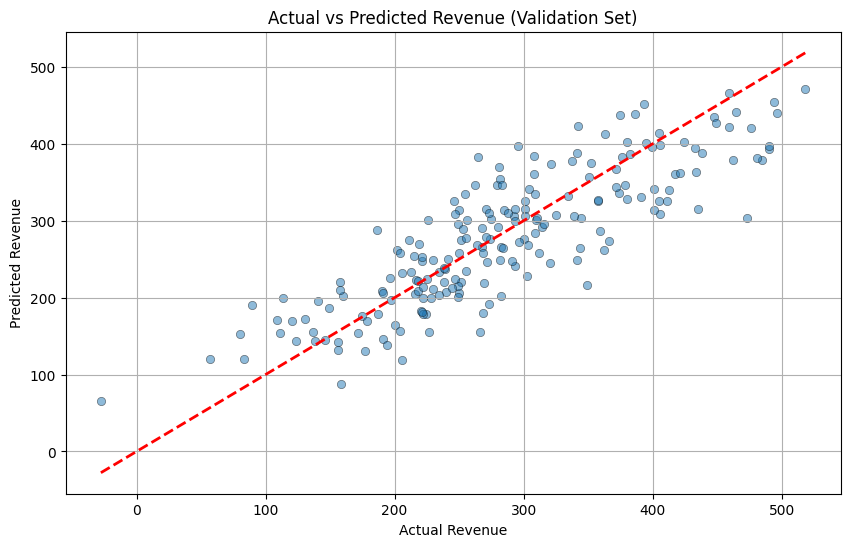

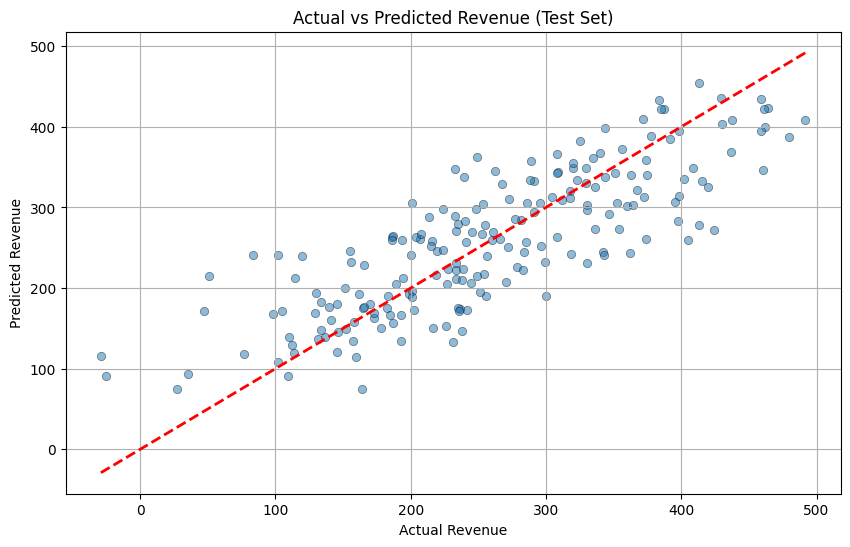

In [16]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5, edgecolors='k', linewidth=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plotting the actual vs predicted values for the validation set
plot_actual_vs_predicted(y_val, y_val_pred, 'Actual vs Predicted Revenue (Validation Set)')

# Plotting the actual vs predicted values for the test set
plot_actual_vs_predicted(y_test, y_test_pred, 'Actual vs Predicted Revenue (Test Set)')


## Saving and loading the model

In [17]:
import joblib

# Save the model to disk
joblib.dump(model, 'linear_regression_model.pkl')

# Save the scaler to disk
joblib.dump(scaler, 'scaler.pkl')

# Load the model from disk
loaded_model = joblib.load('linear_regression_model.pkl')

# Load the scaler from disk
loaded_scaler = joblib.load('scaler.pkl')

## Making predictions with new data

In [18]:
# Example new data
new_data = pd.DataFrame({
    'Number_of_Customers': [50, 70, 60],
    'Menu_Price': [40, 45, 55],
    'Marketing_Spend': [10, 15, 12],
    'Cuisine_Type': ['Italian', 'Japanese', 'Mexican'],
    'Average_Customer_Spending': [20, 30, 25],
    'Promotions': [1, 0,1],
    'Reviews': [30, 60, 20]
})

# Preprocessing the new data
#new_data.fillna(method='ffill', inplace=True)
new_data = pd.get_dummies(new_data, columns=['Cuisine_Type'], drop_first=False)

# Ensure new_data has the same columns as the training data
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]

# Scale the new data
new_data_scaled = loaded_scaler.fit_transform(new_data)

# Making predictions
new_predictions = loaded_model.predict(new_data_scaled)
print("Predicted Monthly Revenue:", new_predictions)


Predicted Monthly Revenue: [120.48211747 394.02316696 287.4656673 ]


c:\Users\LuisValencia\anaconda3\envs\mmlbook\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
